# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
train = pd.read_csv("Stress_train.csv")
test = pd.read_csv("Stress_test.csv")

In [3]:
train.tail()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress
369288,814.428911,815.178790,67.697387,20.649551,20.649546,3.278395,74.197905,23.400000,0.533333,14.606307,...,60.596026,1.907159,3.438658,3177.292709,28.081116,0.035611,2.208193,1.234087,2,no stress


In [4]:
test.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


# Exploratory data Analysis

In [5]:
train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [6]:
train.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

<BarContainer object of 3 artists>

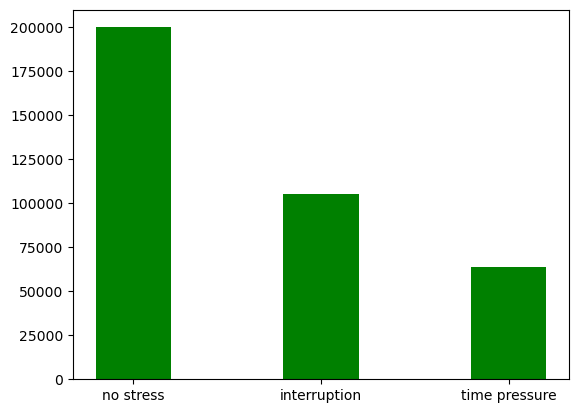

In [8]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

# Encoding the lables 

In [9]:
#target variable encoding
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

In [10]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(train)
#profile.to_file("output.html")

# Check the correlation

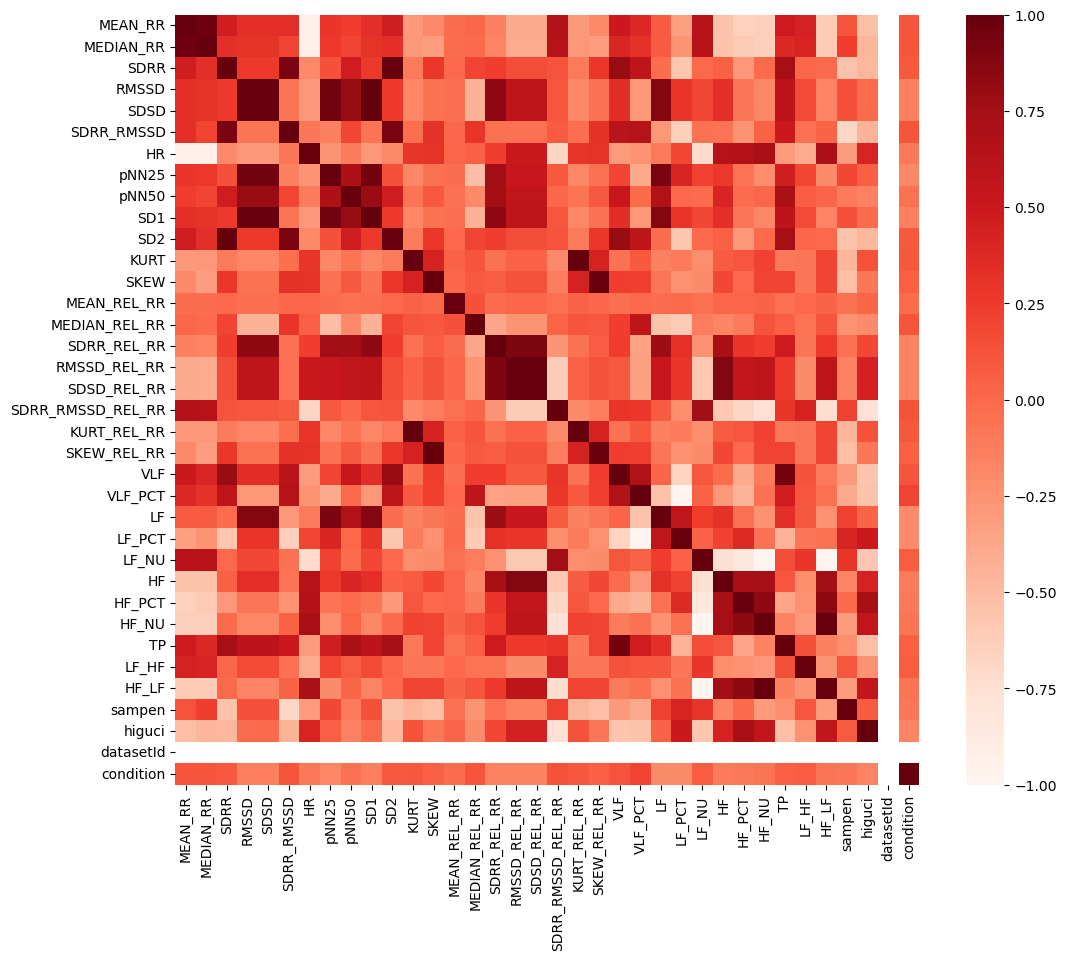

In [11]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

# Feature Selection

In [12]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [13]:
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)

In [14]:
reduced_train

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287,1.0
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728,0.0
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225,0.0
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308,1.0
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366,1.0
...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,3.785409,0.000083,1.529068,298.009244,45.893349,1.0
369285,984.266492,978.622945,5.443754,0.000046,2.218313,1558.597883,68.405858,1.0
369286,1025.499743,1024.968400,4.134664,-0.002236,2.391601,1950.393956,45.030641,1.0
369287,798.123167,803.559610,4.687302,-0.001354,1.894304,1606.291482,54.821185,1.0


# ploting extracted features

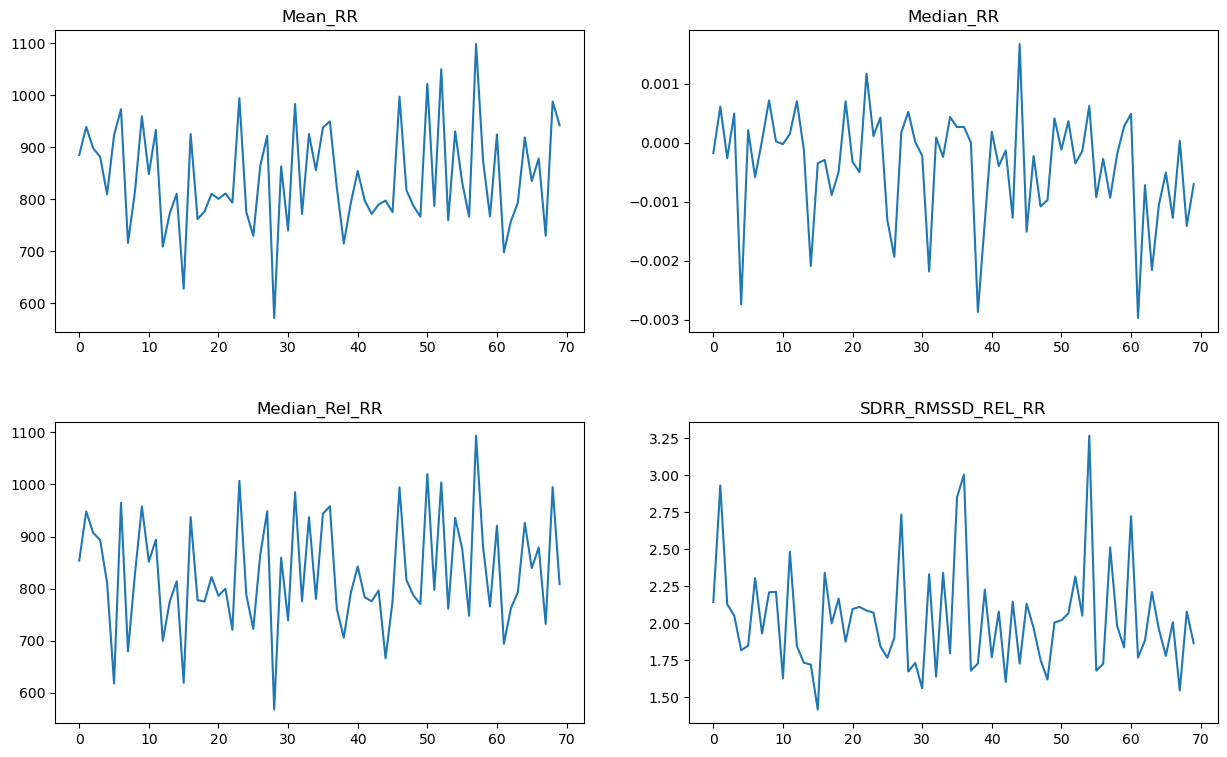

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

<Axes: >

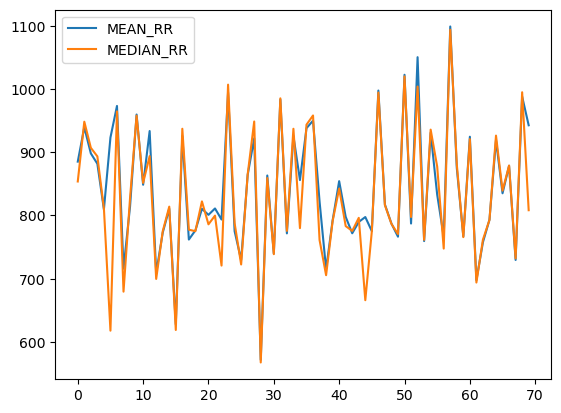

In [16]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()

# Splitting data into train and test

In [17]:
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [18]:
X_test = test[X_train.columns]
y_test = test['condition']

In [19]:
X_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366


In [20]:
X_test.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,721.901897,727.267280,6.044877,-0.000951,1.570800,1016.073759,59.818117
1,843.538633,844.407930,3.031234,-0.001543,1.918953,765.518473,32.452560
2,958.523868,966.671125,6.224565,-0.002000,2.298473,2237.739905,51.696218
3,824.838669,842.485905,10.008830,0.000445,2.116033,2330.980957,81.661325
4,756.707933,747.941620,10.777899,-0.000170,1.681034,4750.624447,89.465158


# Models implementation & Evaluation

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier()
}



# Model Evaluation

--- Logistic Regression ---
Accuracy: 0.5781931616016377
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.36      0.42     11782
           1       0.60      0.85      0.71     22158
           2       0.47      0.09      0.14      7093

    accuracy                           0.58     41033
   macro avg       0.52      0.43      0.42     41033
weighted avg       0.55      0.58      0.53     41033



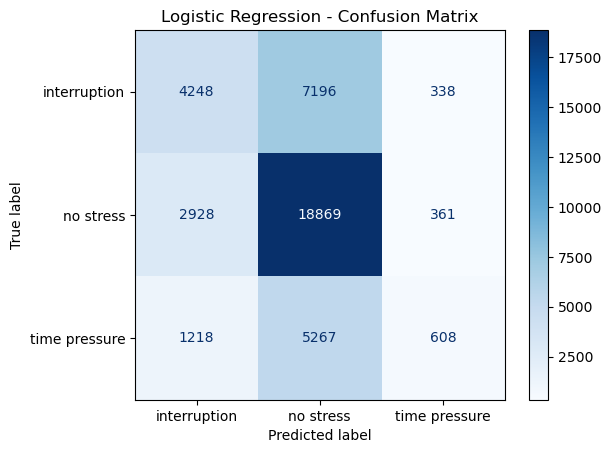

--- Random Forest ---
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



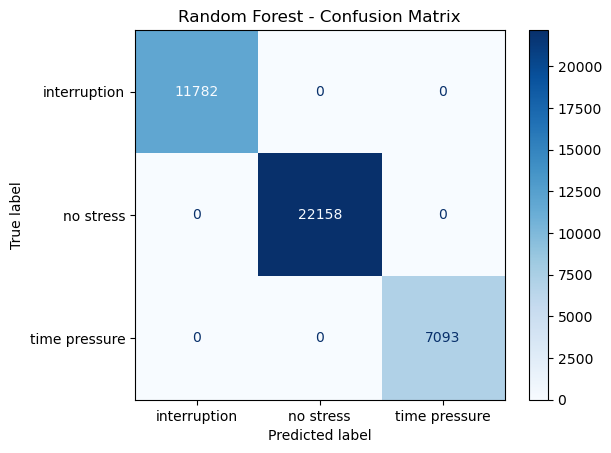

--- Decision Tree ---
Accuracy: 0.9986108741744449
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



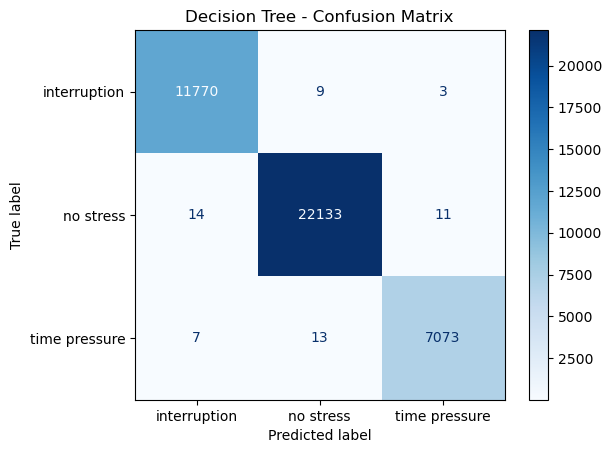

--- K-Nearest Neighbors ---
Accuracy: 0.9722662247459362
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11782
           1       0.98      0.98      0.98     22158
           2       0.96      0.96      0.96      7093

    accuracy                           0.97     41033
   macro avg       0.97      0.97      0.97     41033
weighted avg       0.97      0.97      0.97     41033



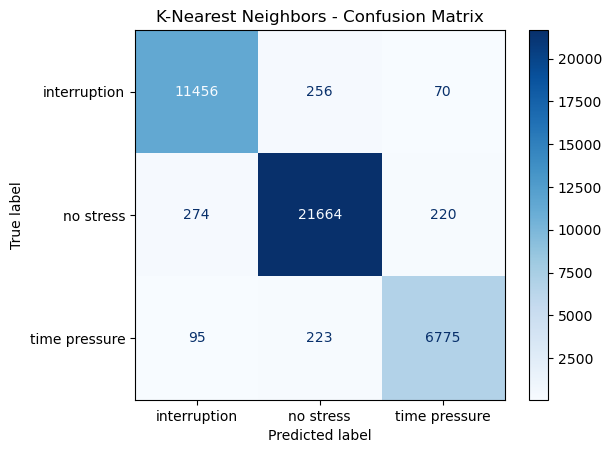

--- Naive Bayes ---
Accuracy: 0.5528964491994248
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.12      0.19     11782
           1       0.62      0.82      0.70     22158
           2       0.36      0.44      0.40      7093

    accuracy                           0.55     41033
   macro avg       0.48      0.46      0.43     41033
weighted avg       0.53      0.55      0.50     41033



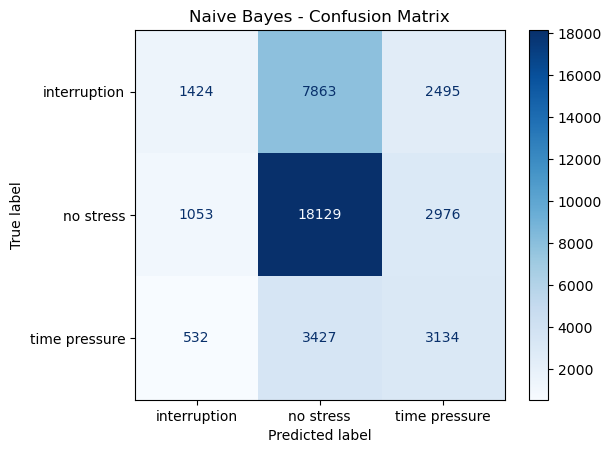

--- Linear Discriminant Analysis ---
Accuracy: 0.60595130748422
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.27      0.36     11782
           1       0.62      0.89      0.73     22158
           2       0.56      0.29      0.38      7093

    accuracy                           0.61     41033
   macro avg       0.57      0.48      0.49     41033
weighted avg       0.59      0.61      0.56     41033



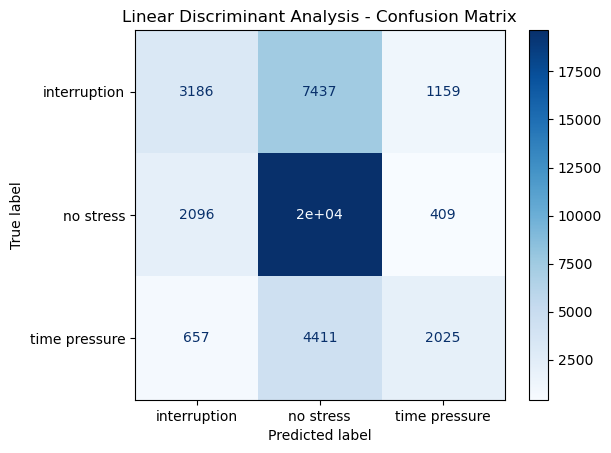

--- Gradient Boosting ---
Accuracy: 0.8416883971437623
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81     11782
           1       0.83      0.93      0.88     22158
           2       0.84      0.69      0.76      7093

    accuracy                           0.84     41033
   macro avg       0.85      0.79      0.82     41033
weighted avg       0.84      0.84      0.84     41033



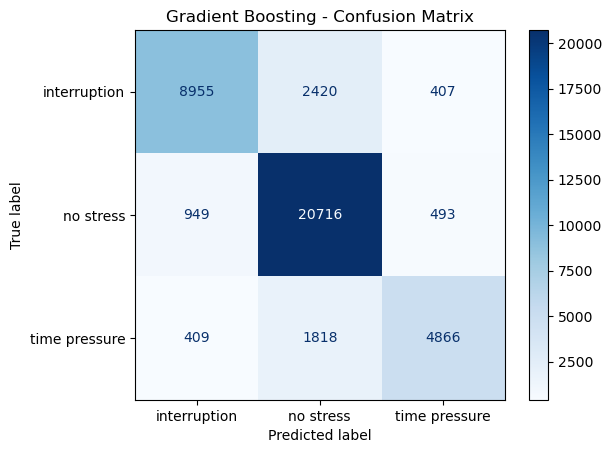

In [22]:
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [24]:
import joblib
#Saving the Random Forest model only
joblib.dump(model, "random_forest_model.pkl")
print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl


# User Interface 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
import tkinter as tk
from tkinter import messagebox, PhotoImage
import joblib
import numpy as np

class StressPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Stress Prediction using Random Forest")
        self.root.geometry("500x600")

        # Background Image
        #self.bg_image = PhotoImage(file="background.png")
        #self.bg_label = tk.Label(root, image=self.bg_image)
        #self.bg_label.place(x=0, y=0, relwidth=1, relheight=1)

        # Foreground Frame for content
        self.content_frame = tk.Frame(root, bg="white", bd=2, relief="solid")
        self.content_frame.place(relx=0.5, rely=0.5, anchor="center")

        # Project Title with space below
        self.title_label = tk.Label(self.content_frame, text="Stress Prediction using Machine Learning", font=("Arial", 16, "bold"), bg="#ffffff", fg="#000000")
        self.title_label.pack(pady=(10, 20))  # Increased bottom padding for space

        self.labels = [
            "Average Heart Rate (BPM)", "Typical Heart Rate (BPM)", "Stress Balance Ratio",
            "Heart Rate Stability Score", "Adaptive Stress Indicator",
            "Stress Response Level", "Stress Response Percentage"
        ]
        self.entries = {}

        for label in self.labels:
            tk.Label(self.content_frame, text=label, bg="#ffffff", fg="#000000").pack()
            entry = tk.Entry(self.content_frame)
            entry.pack(pady=3)  # Added padding between entries
            self.entries[label] = entry

        self.predict_button = tk.Button(self.content_frame, text="Predict", command=self.predict, bg="#4CAF50", fg="#ffffff")
        self.predict_button.pack(pady=10)

        self.result_label = tk.Label(self.content_frame, text="Prediction Result: ", bg="#ffffff", fg="#000000")
        self.result_label.pack(pady=10)

        # Student Name
        self.student_label = tk.Label(root, text="By: Engr. Talha Nazir", font=("Arial", 10, "italic"), bg="#ffffff", fg="#000000")
        self.student_label.pack(side="bottom", pady=5)

    def predict(self):
        try:
            model = joblib.load("random_forest_model.pkl")

            input_features = [float(self.entries[label].get()) for label in self.labels]
            input_array = np.array([input_features])

            prediction = model.predict(input_array)[0]

            if prediction == 0:
                predicted_class = "No Stress"
            elif prediction == 1:
                predicted_class = "Interruption"
            elif prediction == 2:
                predicted_class = "Time Pressure"
            else:
                predicted_class = "Unknown"

            self.result_label.config(text=f"Prediction Result: {predicted_class}")

        except Exception as e:
            messagebox.showerror("Error", f"Failed to make prediction.\n{str(e)}")

root = tk.Tk()
app = StressPredictionApp(root)
root.mainloop()